In [1]:
#BASE PACKAGES
import re
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statistics import mode
%matplotlib inline

#PREPROCESSING PACKAGES
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#MODELLING PACKAGES

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#VALIDATION PACKAGES
from sklearn.model_selection import cross_val_score

#EVALUATION METRIC PACKAGES
from sklearn.metrics import mean_squared_error


In [2]:
train = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Analytics vidya\Loan_predictions\train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Analytics vidya\Loan_predictions\test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


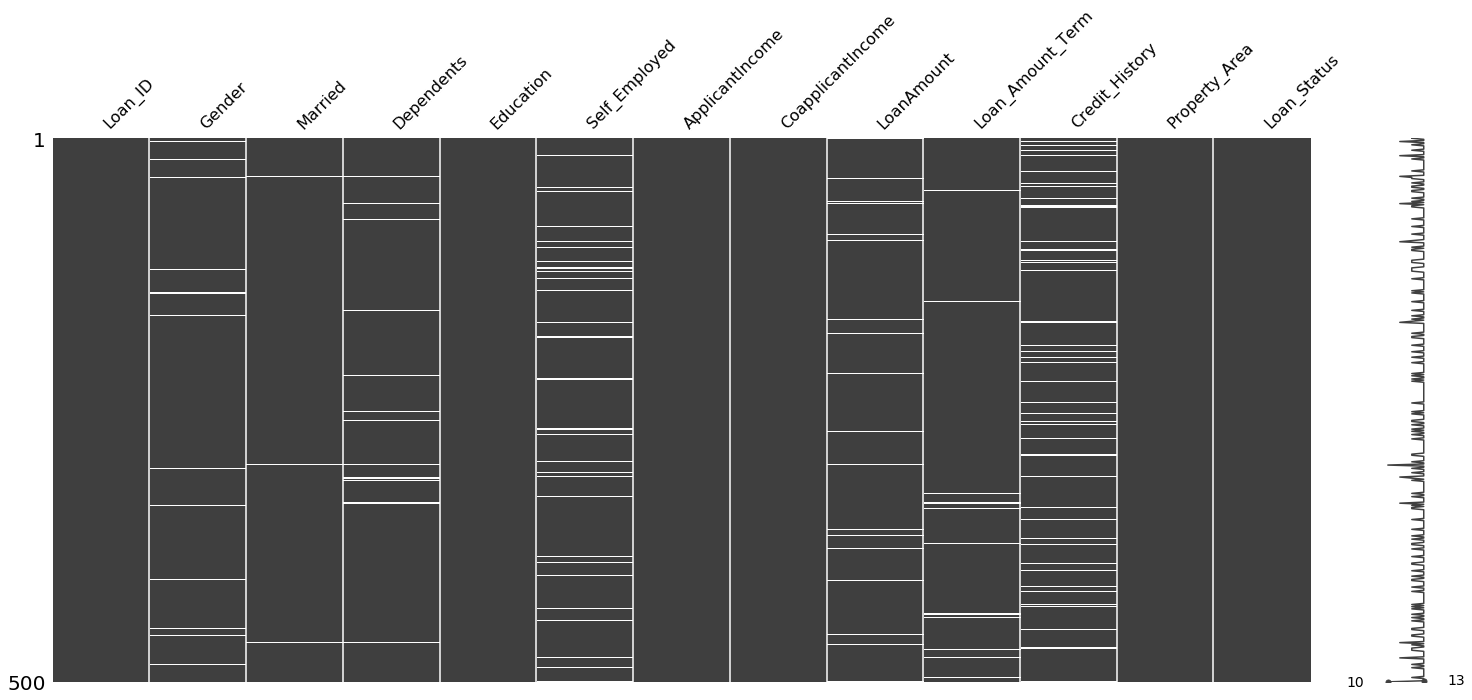

In [4]:
msno.matrix(train.sample(500))

In [5]:
pd.crosstab(index = train.Gender, columns= train.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [6]:
pd.crosstab(index = train.Married, columns= train.Loan_Status)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [7]:
pd.crosstab(index = train.Self_Employed, columns= train.Loan_Status)

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
numeric = train._get_numeric_data()
char = train.select_dtypes(include = ['object'])

In [12]:
numeric.isnull().sum()
#len(train)
#numeric.LoanAmount.count()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [13]:
for col in numeric:
    if numeric[col].count() != 614:
        numeric[col] = numeric[col].fillna(numeric[col].mean())


In [14]:
char.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [15]:
char.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [16]:
char_new = char.drop(['Loan_ID', 'Dependents'], axis = 1)

In [17]:
lab = LabelEncoder()
lab.fit(char_new['Gender'].astype(str))
char_new['Gender'] = lab.fit_transform(char_new['Gender'].astype(str))

lab2 = LabelEncoder()
lab2.fit(char_new['Married'].astype(str))
char_new['Married'] = lab2.fit_transform(char_new['Married'].astype(str))

lab3 = LabelEncoder()
lab3.fit(char_new['Education'].astype(str))
char_new['Education'] =lab3.fit_transform(char_new['Education'].astype(str))

lab4 = LabelEncoder()
lab4.fit(char_new['Self_Employed'].astype(str))
char_new['Self_Employed']=lab4.fit_transform(char_new['Self_Employed'].astype(str))

lab5 = LabelEncoder()
lab5.fit(char_new['Property_Area'].astype(str))
char_new['Property_Area'] = lab5.fit_transform(char_new['Property_Area'].astype(str))

lab6 = LabelEncoder()
lab6.fit(char_new['Loan_Status'].astype(str))
char_new['Loan_Status'] = lab6.fit_transform(char_new['Loan_Status'].astype(str))


In [18]:
char_new.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [19]:
char_new = pd.concat([char_new , char['Dependents']], axis = 1)

In [20]:
char_new.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
0,1,0,0,0,2,1,0
1,1,1,0,0,0,0,1
2,1,1,0,1,2,1,0
3,1,1,1,0,2,1,0
4,1,0,0,0,2,1,0


In [21]:
char = char_new.drop(['Loan_Status'], axis = 1)

In [22]:
f_t = pd.concat([char, numeric], axis = 1)

In [23]:
f_t = f_t.drop(['Dependents'], axis = 1)

In [24]:
numeric.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


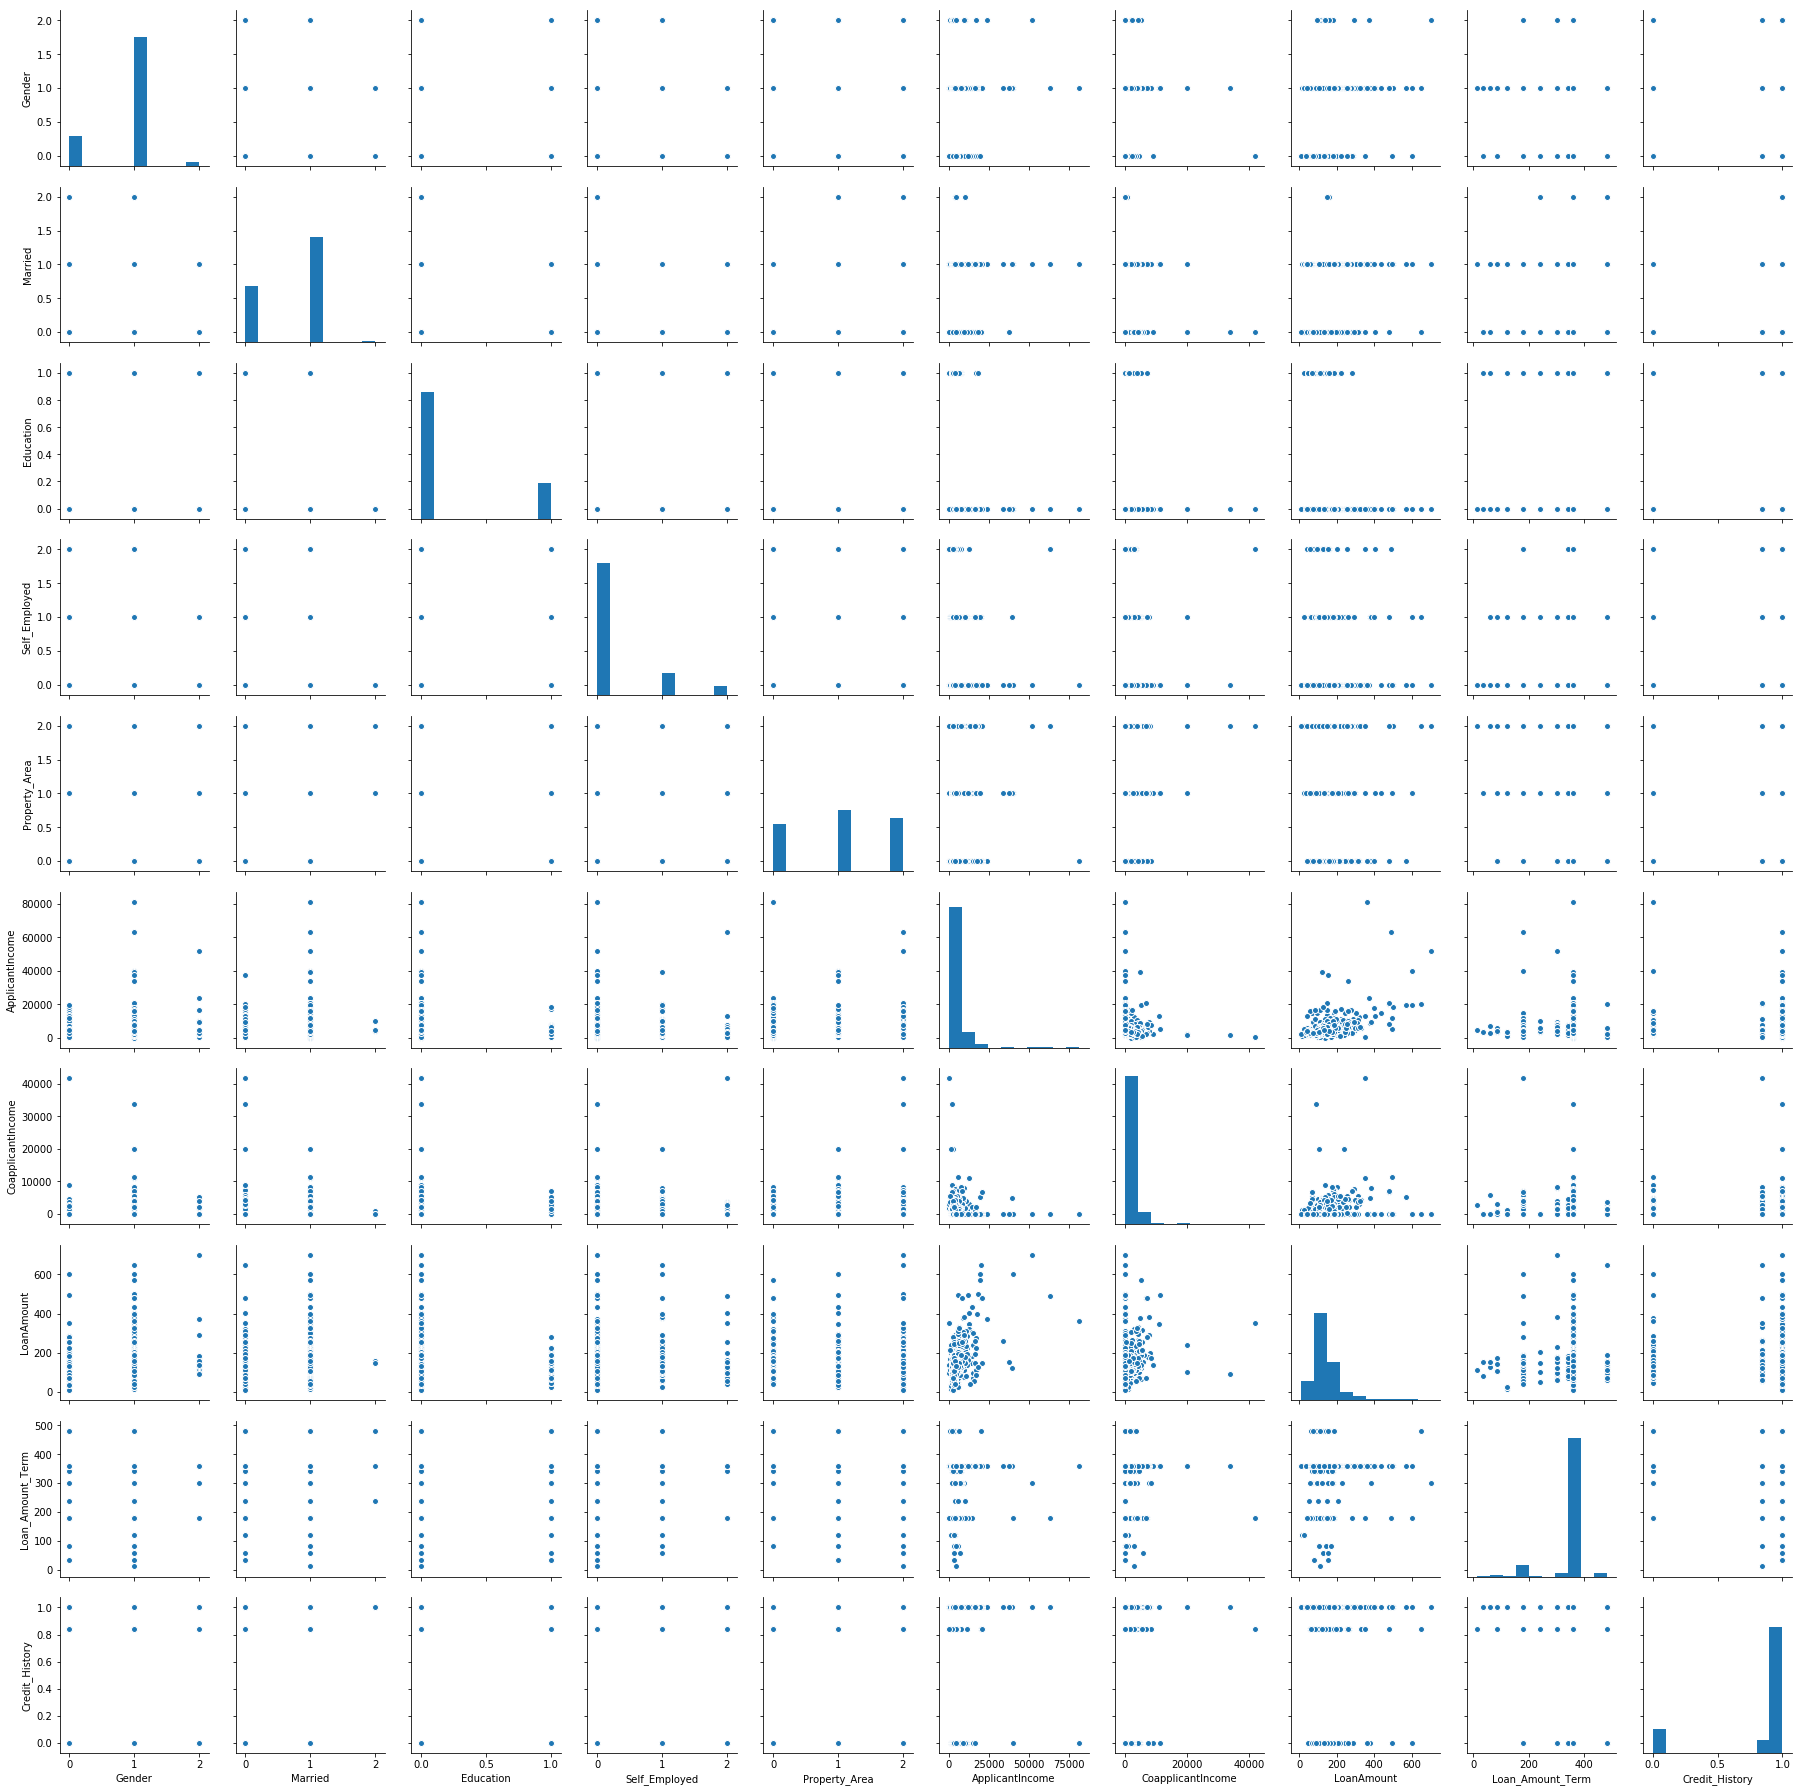

In [25]:
sns.pairplot(f_t)

In [26]:
f_t = f_t.drop([''], axis =1)

ValueError: labels [''] not contained in axis

In [28]:
f_t.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [29]:
#for test data

In [30]:
tnumeric = test._get_numeric_data()
tchar = test.select_dtypes(include = ['object'])

In [31]:
tnumeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,NaN
4,3276,0,78.0,360.0,1.0


In [32]:
for col in tnumeric.columns:
    if tnumeric[col].count() != 367:
        tnumeric[col] = tnumeric[col].fillna(tnumeric[col].mean())

In [33]:
tchar.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


In [34]:
#tchar = tchar.drop(['Loan_ID', 'Dependents'], axis = 1)
len(tchar)

367

In [35]:
for col in tchar.columns:
    lab = LabelEncoder()
    lab.fit(tchar[col].astype(str))
    tchar[col] = lab.fit_transform(tchar[col].astype(str))

C:\Users\nilu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
tchar.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [37]:
f_test = pd.concat([tchar, tnumeric], axis = 1)

In [38]:
f_test = f_test.drop(['LoanAmount', 'CoapplicantIncome'], axis = 1)

In [39]:
f_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,Loan_Amount_Term,Credit_History
0,0,1,1,0,0,0,2,5720,360.0,1.000000
1,1,1,1,1,0,0,2,3076,360.0,1.000000
2,2,1,1,2,0,0,2,5000,360.0,1.000000
3,3,1,1,2,0,0,2,2340,360.0,0.825444
4,4,1,0,0,1,0,2,3276,360.0,1.000000


In [40]:
f_t = f_t.drop(['CoapplicantIncome'], axis = 1)

In [41]:
f_t.head()

,Gender,Married,Education,Self_Employed,Property_Area,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,2,5849,146.412162,360.0,1.0
1,1,1,0,0,0,4583,128.000000,360.0,1.0
2,1,1,0,1,2,3000,66.000000,360.0,1.0
3,1,1,1,0,2,2583,120.000000,360.0,1.0
4,1,0,0,0,2,6000,141.000000,360.0,1.0


# Modelling ----  Ensembling --- Techniques

In [42]:
X = f_t
st = LabelEncoder()
st.fit(train.Loan_Status.astype(str))
train.Loan_Status = st.fit_transform(train.Loan_Status.astype(str))
y = train.Loan_Status.reshape(-1 , 1)
X_t = f_test

C:\Users\nilu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# Ensemble --- Voting

In [44]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_t)
pred2=model2.predict(X_t)
pred3=model3.predict(X_t)

final_pred = np.array([])
for i in range(0,len(X_t)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

C:\Users\nilu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\nilu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Number of features of the model must match the input. Model n_features is 9 and input n_features is 10 

In [ ]:
final_pres = pd.DataFrame(final_pred)
final_pres.to_csv('win1.csv')

In [45]:
sp = StratifiedKFold(n_splits = 5, random_state= 1)
aa = sp.split(X, y)
for train_indices, val_indices in aa:
    print(train_indices)
    print(val_indices)

[118 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 37

# Prediction ensembling --- Technique used ---- Stacking Decision tree, KNeighbors, Logistic Regression

In [46]:
def stacking(model, train, y, test, n_fold):
    folds = StratifiedKFold(n_splits =n_fold, random_state = 1)
    test_pred = np.empty((0, 1), float)
    train_pred= np.empty((0, 1), float)
    
    for train_indices, val_indices in folds.split(train, y):
        x_train, x_test = train.iloc[train_indices] , train.iloc[val_indices]
        y_train, y_test = y.iloc[train_indices] , y.iloc[val_indices]
        
        model.fit(X = x_train, y = y_train)
        train_pred  = np.append(train_pred, model.predict(x_test))
        test_pred = np.append(test_pred, model.predict(test))
        return test_pred.reshape(-1, 1), train_pred.reshape(-1, 1)                

In [47]:
model1 = DecisionTreeClassifier(random_state = 1)
test_pred1 , train_pred1 = stacking(model = model1, n_fold = 10, train = X_train, test = X_test, y = y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
model2 = KNeighborsClassifier()
test_pred2 , train_pred2 = stacking(model = model2, n_fold =10, train = X_train, y=y_train, test =X_test)

In [ ]:
model3 = LogisticRegression()
test_pred3 , train_pred3 = stacking(model = model3, train = X_train, y=y_train , test =X_test, n_fold =10)

In [ ]:
train_pred1 = pd.DataFrame(train_pred1)
train_pred2 = pd.DataFrame(train_pred2)
test_pred1 = pd.DataFrame(test_pred1)
test_pred2 = pd.DataFrame(test_pred2)

In [ ]:
df = pd.concat([train_pred1 , train_pred2], axis =1)
df_test = pd.concat([test_pred1, test_pred2], axis = 1)

model = LogisticRegression(random_state =1)
model.fit(df, y_train)
model.score(df_test, y_test)

# Technique used ----- Blending KNN, DT and top model as LR
<img src = "image-5-300x228.png">

In [ ]:
# y = pd.DataFrame(y)

In [ ]:
kf = StratifiedKFold(n_splits = 4)
for train_index, test_index in kf.split(X, y):
    X_train ,X_test = X.iloc[train_index] , X.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]
    
    print(len(X_train))
    print(len(y_train))
    print(len(X_test))
    print(len(y_test))
    #model.fit(X_train, y_train)
    #train_pred = np.append(train_pred , model.predict(X_test)
    #test_pred = np.append(test_pred, model.predict(test))
    

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
val_pred1 = model1.predict(X_test)
test_pred1 = model.predict(X_t)

val_pred1 = pd.DataFrame(val_pred1)
test_pred1 = pd.DataFrame(test_pred1)

model21 = KNeighbors()
model2.fit(X_train, y_train)
val_pred2 = model2.predict(X_test)
test_pred2 = model2.predict(X_t)

val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

df_val = pd.concat([x_val, val_pred1, val_pred2], axis = 1)
df_test = pd.concat([x_t, test_pred1, test_pred2], axis = 1)

model = LogisticRegression()
modle.fit(df_val, y_val)
model.score(df_test, y_test)



# Bagging ----  Boosting

In [ ]:
from sklearn.tree import BaggingClassifier
from sklearn import tree
model = BagginClassifier(DecisionTreeClassifier(random_state = 1))
model.fit(X_train, y_train)
model.score(X_test, y_test)


## For regression

In [ ]:
from sklearn import BaggingRegressor
model = BaggingRegressor(DecisionTreeRegressor(random_state  = 1))
model.fit(X_train, y_train)
model.score()


#### Parameters used in boosting are 
##### base_estimators, n_estimators, max_samples, max_features, n_jobs, random_state, verbose, etc


In [54]:
f_t = pd.concat([train['ApplicatIncome'], f_t], axis =1 )

In [53]:
f_t.head()

,Gender,Married,Education,Self_Employed,Property_Area,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,2,5849,146.412162,360.0,1.0
1,1,1,0,0,0,4583,128.000000,360.0,1.0
2,1,1,0,1,2,3000,66.000000,360.0,1.0
3,1,1,1,0,2,2583,120.000000,360.0,1.0
4,1,0,0,0,2,6000,141.000000,360.0,1.0


## Parameters for LightGBM

### num_iterations, num_leaves , min_data_in_leaf, max_depth, bagging_function, max_bin